# Определение перспективного тарифа для телеком-компании

       Мы - аналитик компании «Мегалайн» — федерального оператора сотовой связи.  
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Calls" data-toc-modified-id="Calls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calls</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Messages" data-toc-modified-id="Messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Messages</a></span></li><li><span><a href="#Tariffs" data-toc-modified-id="Tariffs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Tariffs</a></span></li><li><span><a href="#Users" data-toc-modified-id="Users-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Users</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Найдите-и-исправьте-ошибки-в-данных" data-toc-modified-id="Найдите-и-исправьте-ошибки-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Найдите и исправьте ошибки в данных</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подытог</a></span></li><li><span><a href="#Расчет-использованных-услуг-по-пользователям-в-месяц" data-toc-modified-id="Расчет-использованных-услуг-по-пользователям-в-месяц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчет использованных услуг по пользователям в месяц</a></span><ul class="toc-item"><li><span><a href="#Помесячная-выручку-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручку-с-каждого-пользователя-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Помесячная выручку с каждого пользователя</a></span></li></ul></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-объемов-использования-услуг" data-toc-modified-id="Анализ-объемов-использования-услуг-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ объемов использования услуг</a></span></li><li><span><a href="#Анализ-выручки" data-toc-modified-id="Анализ-выручки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ выручки</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li><li><span><a href="#Дополнительный-анализ" data-toc-modified-id="Дополнительный-анализ-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Дополнительный анализ</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

### Calls

In [2]:
try:
    calls = pd.read_csv('C://datasets/calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

    
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


### Internet

In [3]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [4]:
a =  internet['Unnamed: 0'] - internet['Unnamed: 0'].index
a.unique()

array([0])

    Стобец "Unnamed: 0" копирует индекс, поэтому удалим его.

In [5]:
internet = internet.drop('Unnamed: 0', axis=1)

### Messages

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.head(10)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


### Tariffs

In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Users

In [8]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head(10)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [9]:
print('Самая рання дата регистрации пользолателя: ', users['reg_date'].min())
print('Самая поздняя дата регистрации пользолателя: ', users['reg_date'].max())

Самая рання дата регистрации пользолателя:  2018-01-01
Самая поздняя дата регистрации пользолателя:  2018-12-31


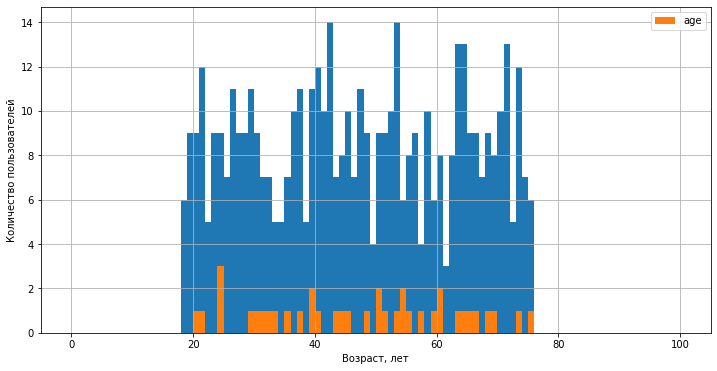

In [10]:
ax = users['age'].hist(bins = 100, range = (0,100))
bx = users[users['churn_date'].notna()]['age'].hist(bins = 100, range = (0,100), legend = True, figsize = (12,6))
ax.set_xlabel("Возраст, лет")
ax.set_ylabel("Количество пользователей")
None

Видим, что выборка по возрасту пользователей равномерна, как и распределение 38 человек, которые отключились от тарифов. 

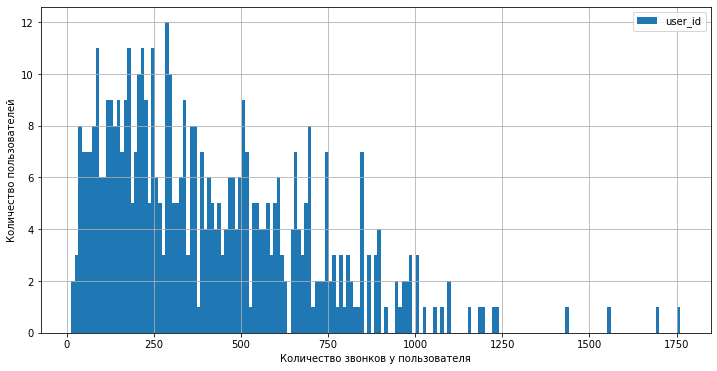

In [11]:
ax = calls['user_id'].value_counts().hist(legend = True, figsize = (12,6), bins = 175)
ax.set_xlabel("Количество звонков у пользователя")
ax.set_ylabel("Количество пользователей")
None

In [12]:
print('Самые длительные звонки из датасета')
display(calls['duration'].sort_values(ascending = False).head().tolist())

Самые длительные звонки из датасета


[38.0, 37.35, 36.47, 36.12, 35.95]

- Большинство пользователей делает менее одного звонка в день;
- Самый длинный звонок за год - 38 минут

Статистика звонков без пропущенных


count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

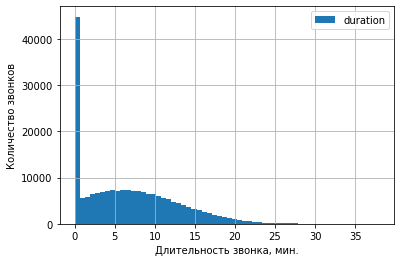

In [13]:
ax = calls['duration'].hist(bins = 60, legend = True)
ax.set_xlabel("Длительность звонка, мин.")
ax.set_ylabel("Количество звонков")
None
print('Статистика звонков без пропущенных')
calls[calls['duration']!=0]['duration'].describe()


- по длительности звонков нормальное распределение с пиком звонков в ноль секунд;
- В среднем звонки длились 8.5 минут;
- в описании есть информация, что это неотвеченные и сброшенные звонки.

In [14]:
calls['call_date'].value_counts().head(15)

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
2018-12-18    1141
2018-12-21    1135
2018-12-17    1132
2018-12-14    1128
2018-12-20    1126
2018-12-25    1122
2018-12-24    1114
2018-12-27    1110
2018-12-28    1106
2018-12-08    1105
Name: call_date, dtype: int64

- Больше всего звонков в декабре.

In [15]:
print(internet['session_date'].value_counts().head(15))
print(internet['session_date'].value_counts().tail(15))

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
2018-12-21     833
2018-12-29     825
2018-12-24     820
2018-12-12     816
2018-12-23     808
2018-12-13     805
2018-12-05     804
2018-12-27     803
2018-12-28     802
2018-12-02     801
Name: session_date, dtype: int64
2018-01-19    35
2018-01-10    32
2018-01-15    31
2018-01-14    29
2018-01-11    28
2018-01-12    23
2018-01-08    23
2018-01-09    21
2018-01-06    19
2018-01-07    17
2018-01-05    14
2018-01-04     9
2018-01-03     6
2018-01-01     3
2018-01-02     3
Name: session_date, dtype: int64


- Больше всего пользовались интернетом в декабре;
- Меньше всего пользовались интерентом в январе.

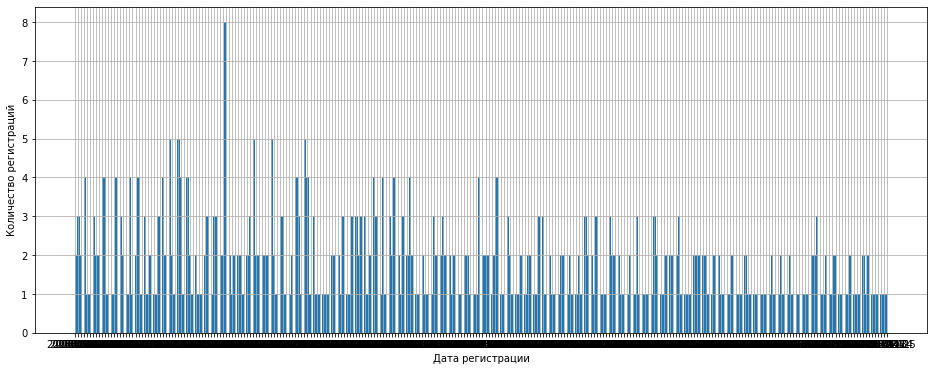

In [16]:
ax = users['reg_date'].hist(bins = 365, figsize = (16,6))
ax.set_xlabel("Дата регистрации")
ax.set_ylabel("Количество регистраций")
None

- пользователи равномерно регистрировались в течении всего года, максимум 8 человек в день;
- получается, пользователи накапливались весь год и почти не отключались от тарифа, потому максимальная активность в декабре, а минимальная - в январе. 

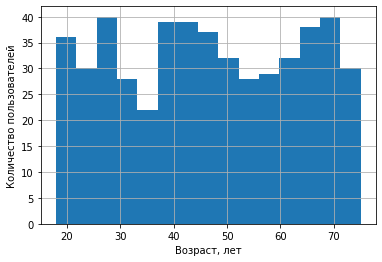

In [18]:
ax = users['age'].hist(bins = 15)
ax.set_xlabel("Возраст, лет")
ax.set_ylabel("Количество пользователей")
None



In [19]:
print('Топ 5 городов по количеству пользователей:\n',  users['city'].value_counts().head(5))
print('\nТоп 5 имён пользователей:\n',  users['first_name'].value_counts().head(5)) # Ну так, интереса ради
print('\nТоп 5 фамилий пользователей:\n',  users['last_name'].value_counts().head(5)) # Ну так, интереса ради

Топ 5 городов по количеству пользователей:
 Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
Name: city, dtype: int64

Топ 5 имён пользователей:
 Радим        6
Пётр         5
Леонид       5
Леон         4
Александр    4
Name: first_name, dtype: int64

Топ 5 фамилий пользователей:
 Андреенко    5
Анищенко     3
Аничкина     3
Березина     3
Соловьев     3
Name: last_name, dtype: int64


### Подытог

- Пользователи постепенно регистрировались в течении года, из-за чего самое большое количество данных в последние месяцы;
- Выборки неплохо сбалансированы по возрасту и дате регистрации, аномалий нет;
- Лишний стобец, дублирующий индек в наборе "internet.csv" был удалён;
- Пропуски в данных отсутвутют, за исключением пропусков в "churn_date. На самом деле это информация о том, что пользователь остался у оператора;
- Необходимо будет сменить типы данных.

## Подготовка данных

### Найдите и исправьте ошибки в данных
Приведём данные к нужным типам;

Найдем и исправим ошибки в данных, если они есть.

- Первым исправим тип данных у дат.

In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

- Проверим на аномалии отключившихся пользователей.

In [21]:
display(users[users['churn_date'].notnull()])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [22]:
calls['user_id'] = calls['user_id'].astype('int')
internet['user_id'] = internet['user_id'].astype('int')
messages['user_id'] = messages['user_id'].astype('int')
users['user_id'] = users['user_id'].astype('int')

- Создадим данные по количеству пользователей на дату регистрации текущего.

In [23]:
users_by_date = 0
for x in users['reg_date'].sort_values():
    users_by_date += 1
    users.loc[users['reg_date'] == x, 'users_by_date'] = users_by_date
    
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_by_date
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,197.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,425.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,227.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,322.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,182.0


In [24]:
users.sort_values(by = 'reg_date').head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,users_by_date
453,1453,50,NaT,Москва,Кузьма,Акуленко,2018-01-01,ultra,2.0
193,1193,55,NaT,Тамбов,Арсен,Безруков,2018-01-01,smart,2.0
55,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,4.0
155,1155,71,NaT,Ставрополь,Александр,Чернов,2018-01-02,smart,4.0
375,1375,53,NaT,Пенза,Мария,Акимычева,2018-01-04,ultra,9.0


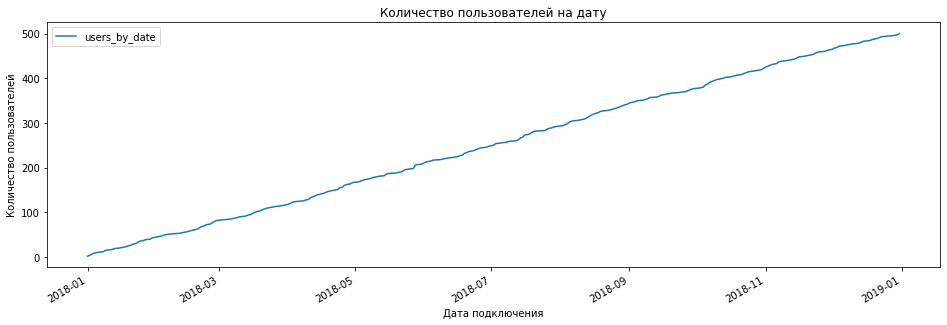

In [25]:
ax = users.plot(x = 'reg_date', y = 'users_by_date', figsize = (16,5))
ax.set_xlabel("Дата подключения")
ax.set_ylabel("Количество пользователей")
ax.set_title("Количество пользователей на дату")
None

- Линейное накопление пользователей в течении всего года.

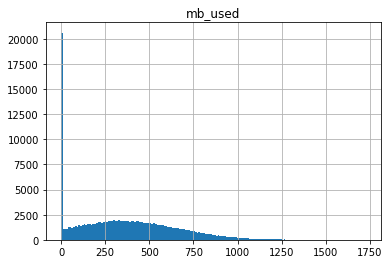

In [26]:
internet.hist(column = 'mb_used', bins = 175)
ax.set_xlabel("Количество использованных мегабайт интернета за сессию")
ax.set_ylabel("Количество сессий")
ax.set_title("Количество использованного интернета за сессию")
None

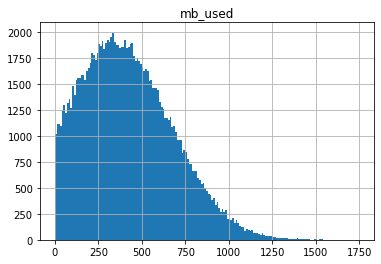

In [27]:
internet.hist(column = 'mb_used', bins = 175, range = (0.1, 1750))
ax.set_xlabel("Количество использованных мегабайт интернета за сессию")
ax.set_ylabel("Количество сессий")
ax.set_title("Количество использованного интернета за сессию")
None


- Много сессий без потраченного интернета. Вероятно, какие-то особенности системы учёта.

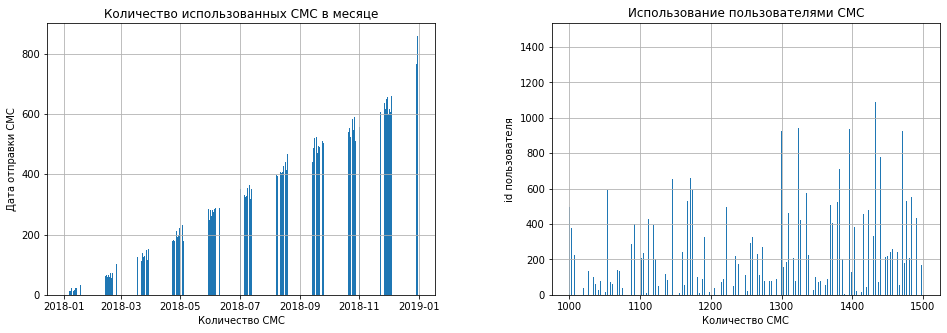

In [28]:
ax = messages.hist(bins = 1500, figsize = (16,5))
ax[0][0].set_xlabel("Количество СМС")
ax[0][0].set_ylabel("Дата отправки СМС")
ax[0][0].set_title("Количество использованных СМС в месяце")
ax[0][1].set_xlabel("Количество СМС")
ax[0][1].set_ylabel("id пользователя")
ax[0][1].set_title("Использование пользователями СМС")
None

- 1500 корзин на 1500 абонентов;
- График по количеству СМС искажен из-за наличия 1500 корзин на 365 дней;
- Лишь небольшая часть пользователей используют СМС, у большинства сообщений очень мало.

In [29]:
sms_by_user_id = messages.pivot_table(
    index = 'user_id', values = 'id', aggfunc = 'count')
display(sms_by_user_id.sort_values(by= 'id').tail(15))

,id
user_id,
1471,924
1300,924
1251,935
1396,936
1324,944
1285,1089
1433,1092
1196,1120
1344,1125


In [30]:
sms_by_user_id.count()

id    426
dtype: int64

- только 426 пользователей из 500 пользовались СМС

### Подытог
    - Подготовка данных завершена

### Расчет использованных услуг по пользователям в месяц

Посчитаем для каждого пользователя:
1) количество сделанных звонков и израсходованных минут разговора по месяцам;

2) количество отправленных сообщений по месяцам;

3) объем израсходованного интернет-трафика по месяцам;

4) помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану).

In [31]:
calls['duration'] = np.ceil(calls['duration']).astype(int) #Каждый звонок округляется вверх до целого количества минут

calls['month'] = pd.DatetimeIndex(calls['call_date']).month #добавляем столбец с месяцем
total_calls_by_month_by_user = calls[calls['duration'] > 0].pivot_table(
    index = ['month', 'user_id'], values = 'duration', aggfunc = ['count', 'sum'])
total_calls_by_month_by_user.columns = ['calls_count', 'calls_duration'] #количество "израсходованных" минут помесячно

display(total_calls_by_month_by_user)

calls_count  calls_duration
month user_id                             
1     1005              11              95
      1032              44             380
      1045               1               9
      1055              47             551
      1071              18             194
...                    ...             ...
12    1494              54             418
      1495             120            1031
      1496              65             518
      1497              58             545
      1499              56             492

[3168 rows x 2 columns]

In [32]:

messages['month'] = pd.DatetimeIndex(messages['message_date']).month
total_msg_by_month_by_user = messages.pivot_table(
    index = ['month', 'user_id'], values = 'id', aggfunc = 'count')
total_msg_by_month_by_user.columns = ['msg_count']

display(total_msg_by_month_by_user) #количетсво сообщений по месяцам

msg_count
month user_id           
1     1005             7
      1032            38
      1045             5
      1055            30
      1071            16
...                  ...
12    1493            78
      1495            84
      1496            51
      1497            17
      1499            66

[2717 rows x 1 columns]

In [33]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

total_internet_by_month_by_users = internet.pivot_table(
    index = ['month', 'user_id'], values = 'mb_used', aggfunc = 'sum')
display(total_internet_by_month_by_users) #объем израсходованного интернет-трафика по месяцам.

mb_used
month user_id          
1     1005      2727.97
      1032     24127.69
      1045      2346.71
      1055     17090.88
      1071     15604.34
...                 ...
12    1494     17621.21
      1495     23426.76
      1496     20736.15
      1497     19918.60
      1499     13055.58

[3203 rows x 1 columns]

In [34]:
for value in total_internet_by_month_by_users.items():
    total_internet_by_month_by_users = (total_internet_by_month_by_users/1024).apply(np.ceil).astype(int) 
total_internet_by_month_by_users.columns = ['gb_used']

display(total_internet_by_month_by_users) #траты интернета по месяцам в гигабайтах


gb_used
month user_id         
1     1005           3
      1032          24
      1045           3
      1055          17
      1071          16
...                ...
12    1494          18
      1495          23
      1496          21
      1497          20
      1499          13

[3203 rows x 1 columns]

In [35]:
users_monthly_activity = total_calls_by_month_by_user.join(total_msg_by_month_by_user, how = 'outer')
users_monthly_activity = users_monthly_activity.join(total_internet_by_month_by_users, how = 'outer')

display(users_monthly_activity) #сведем в общую таблицу

calls_count  calls_duration  msg_count  gb_used
month user_id                                                 
1     1005            11.0            95.0        7.0      3.0
      1032            44.0           380.0       38.0     24.0
      1045             1.0             9.0        5.0      3.0
      1055            47.0           551.0       30.0     17.0
      1071            18.0           194.0       16.0     16.0
...                    ...             ...        ...      ...
12    1494            54.0           418.0        NaN     18.0
      1495           120.0          1031.0       84.0     23.0
      1496            65.0           518.0       51.0     21.0
      1497            58.0           545.0       17.0     20.0
      1499            56.0           492.0       66.0     13.0

[3214 rows x 4 columns]

In [36]:
user_tariffs = pd.DataFrame()
user_tariffs['user_id'] = users['user_id']
user_tariffs['tariff'] = users['tariff']
user_tariffs = user_tariffs.set_index('user_id')
users_monthly_activity = users_monthly_activity.join(user_tariffs, how = 'outer') 
display(users_monthly_activity) #добавляем к данным тариф

calls_count  calls_duration  msg_count  gb_used tariff
month user_id                                                        
1     1005            11.0            95.0        7.0      3.0  smart
      1032            44.0           380.0       38.0     24.0  smart
      1045             1.0             9.0        5.0      3.0  smart
      1055            47.0           551.0       30.0     17.0  smart
      1071            18.0           194.0       16.0     16.0  smart
...                    ...             ...        ...      ...    ...
12    1494            54.0           418.0        NaN     18.0  smart
      1495           120.0          1031.0       84.0     23.0  ultra
      1496            65.0           518.0       51.0     21.0  smart
      1497            58.0           545.0       17.0     20.0  smart
      1499            56.0           492.0       66.0     13.0  smart

[3214 rows x 5 columns]

In [37]:
users_monthly_activity = users_monthly_activity.reset_index() #выведем индексы в отдельные столбцы
users_monthly_activity.describe()

,month,user_id,calls_count,calls_duration,msg_count,gb_used
count,3214.000000,3214.000000,3168.000000,3168.000000,2717.000000,3203.000000
mean,8.317362,1251.590230,51.450126,457.797033,45.283769,17.358414
std,2.905413,144.659172,26.439188,237.423514,35.051363,7.343379
min,1.000000,1000.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,1125.000000,33.000000,290.750000,19.000000,13.000000
50%,9.000000,1253.000000,50.000000,447.500000,38.000000,17.000000
75%,11.000000,1378.750000,67.000000,592.250000,63.000000,21.000000
max,12.000000,1499.000000,190.000000,1673.000000,224.000000,49.000000


In [38]:
users_monthly_activity = users_monthly_activity.fillna(value = 0) #заполним пропуски

####  Помесячная выручку с каждого пользователя

При пересчёте выручки с пользователей будем обращаться к таблице с тарифами на случай, если тарифы поменяются.

In [39]:
for index, row in users_monthly_activity.iterrows(): #своровал в интернете функцию
    if row['tariff'] == 'smart':
        revenue = tariffs.loc[0, 'rub_monthly_fee']
        if (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[0, 'minutes_included']) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[0, 'minutes_included'])*tariffs.loc[0, 'rub_per_minute']
        if (users_monthly_activity.loc[index, 'msg_count'] - tariffs.loc[0, 'messages_included']) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'msg_count'] - tariffs.loc[0, 'messages_included'])*tariffs.loc[0, 'rub_per_message']
        if (users_monthly_activity.loc[index, 'gb_used'] - 15) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'gb_used'] - 15)*tariffs.loc[0, 'rub_per_gb']           
    else:
        revenue = tariffs.loc[1, 'rub_monthly_fee']
        if (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[1, 'minutes_included']) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[1, 'minutes_included'])*tariffs.loc[1, 'rub_per_minute']
        if (users_monthly_activity.loc[index, 'msg_count'] - tariffs.loc[1, 'messages_included']) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'msg_count'] - tariffs.loc[1, 'minutes_included'])*tariffs.loc[1, 'rub_per_message']
        if (users_monthly_activity.loc[index, 'gb_used'] - 30) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'gb_used'] - 30)*tariffs.loc[1, 'rub_per_gb']           
    users_monthly_activity.loc[index, 'revenue'] = revenue
users_monthly_activity.head(15)

,month,user_id,calls_count,calls_duration,msg_count,gb_used,tariff,revenue
0,1,1005,11.0,95.0,7.0,3.0,smart,550.0
1,1,1032,44.0,380.0,38.0,24.0,smart,2350.0
2,1,1045,1.0,9.0,5.0,3.0,smart,550.0
3,1,1055,47.0,551.0,30.0,17.0,smart,1103.0
4,1,1071,18.0,194.0,16.0,16.0,smart,750.0
5,1,1113,13.0,110.0,14.0,1.0,smart,550.0
6,1,1120,4.0,55.0,0.0,1.0,ultra,1950.0
7,1,1126,28.0,272.0,4.0,16.0,ultra,1950.0
8,1,1134,33.0,332.0,32.0,10.0,smart,550.0
9,1,1135,9.0,90.0,1.0,2.0,smart,550.0


In [40]:
users_monthly_activity.query('revenue < 550') #Проверка ошибки, прибыль не может быть менее стоимости дешевого тарифа за месяц

,month,user_id,calls_count,calls_duration,msg_count,gb_used,tariff,revenue


In [41]:
print(f"Cредняя выручка с тарифа smart {users_monthly_activity[users_monthly_activity['tariff'] == 'smart']['revenue'].mean():.0f}")
print(f"Cредняя выручка с тарифа ultra {users_monthly_activity[users_monthly_activity['tariff'] == 'ultra']['revenue'].mean():.0f}")

Cредняя выручка с тарифа smart 1290
Cредняя выручка с тарифа ultra 2070


- Средняя выручка в месяц с тарифа ультра выше;
- Объеденим таблицы с выручкой и персональными данными пользователей.

In [42]:
users_monthly_activity = users_monthly_activity.merge(users, how='outer', on = 'user_id')
users_monthly_activity

,month,user_id,calls_count,calls_duration,msg_count,gb_used,tariff_x,revenue,age,churn_date,city,first_name,last_name,reg_date,tariff_y,users_by_date
0,1.0,1005,11.0,95.0,7.0,3.0,smart,550.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,36.0
1,2.0,1005,55.0,456.0,38.0,8.0,smart,550.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,36.0
2,3.0,1005,63.0,606.0,56.0,11.0,smart,886.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,36.0
3,4.0,1005,77.0,712.0,41.0,10.0,smart,1186.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,36.0
4,5.0,1005,62.0,595.0,42.0,8.0,smart,835.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,12.0,1434,65.0,560.0,21.0,15.0,smart,730.0,73,NaT,Москва,Карина,Субботина,2018-12-14,smart,481.0
3212,12.0,1445,54.0,508.0,75.0,17.0,smart,1049.0,40,NaT,Москва,Рауль,Иванов,2018-12-29,smart,496.0
3213,12.0,1485,72.0,584.0,155.0,23.0,ultra,1950.0,34,NaT,Киров,Таисия,Сухова,2018-12-29,ultra,496.0
3214,NaN,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,483.0


In [43]:
users_monthly_activity[users_monthly_activity['revenue'].isna()]

,month,user_id,calls_count,calls_duration,msg_count,gb_used,tariff_x,revenue,age,churn_date,city,first_name,last_name,reg_date,tariff_y,users_by_date
3214,NaN,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,483.0
3215,NaN,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,494.0


- Два пользователя не воспользовались купленным тарифом. Исключим их из анализа.
- Появился дублирующийся столбец с тарифом. Удалим его и переименуем оставшийся.

In [44]:
users_monthly_activity = users_monthly_activity.drop(index = [3214, 3215])
users_monthly_activity = users_monthly_activity.drop(['tariff_y'], axis=1)
users_monthly_activity = users_monthly_activity.rename(columns={"tariff_x": "tariff", "msg_count": "msg_sent"})
users_monthly_activity.head()

,month,user_id,calls_count,calls_duration,msg_sent,gb_used,tariff,revenue,age,churn_date,city,first_name,last_name,reg_date,users_by_date
0,1.0,1005,11.0,95.0,7.0,3.0,smart,550.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,36.0
1,2.0,1005,55.0,456.0,38.0,8.0,smart,550.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,36.0
2,3.0,1005,63.0,606.0,56.0,11.0,smart,886.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,36.0
3,4.0,1005,77.0,712.0,41.0,10.0,smart,1186.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,36.0
4,5.0,1005,62.0,595.0,42.0,8.0,smart,835.0,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,36.0


### Подытог
- Выполнили подготовку данных к анализу
- Изучили структуру и особенности наборов данных
- Устранили мелкие ошибки в данных и сменили типы данных (даты на даты, целые числа на целые числа)
- Свели в одну таблицу всю информацию, добавив выручку по клиентам, счетчик активных пользователей на момент подключения абонента, посчитали количество совершенных вызовов.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

### Анализ объемов использования услуг

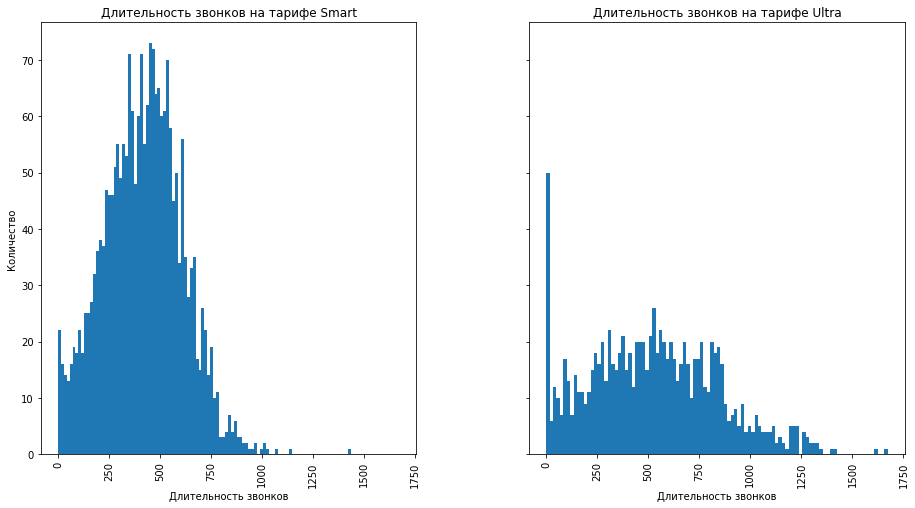

In [45]:
ax = users_monthly_activity.hist(column='calls_duration', by = 'tariff', layout=(1,2), 
                                 bins = 100, figsize = (15,8), sharey = True,  sharex = True)
ax[0].set_xlabel("Длительность звонков")
ax[0].set_ylabel("Количество")
ax[0].set_title("Длительность звонков на тарифе Smart")
ax[1].set_xlabel("Длительность звонков")
ax[1].set_ylabel("Количество")
ax[1].set_title("Длительность звонков на тарифе Ultra")
None

In [46]:
print('Тариф смарт\n',users_monthly_activity[users_monthly_activity['tariff'] == 'smart']['calls_duration'].describe()), 
print('\nТариф ультра\n',users_monthly_activity[users_monthly_activity['tariff'] == 'ultra']['calls_duration'].describe())
None

Тариф смарт
 count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64

Тариф ультра
 count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64


Тариф смарт
 count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: msg_sent, dtype: float64

Тариф ультра
 count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: msg_sent, dtype: float64


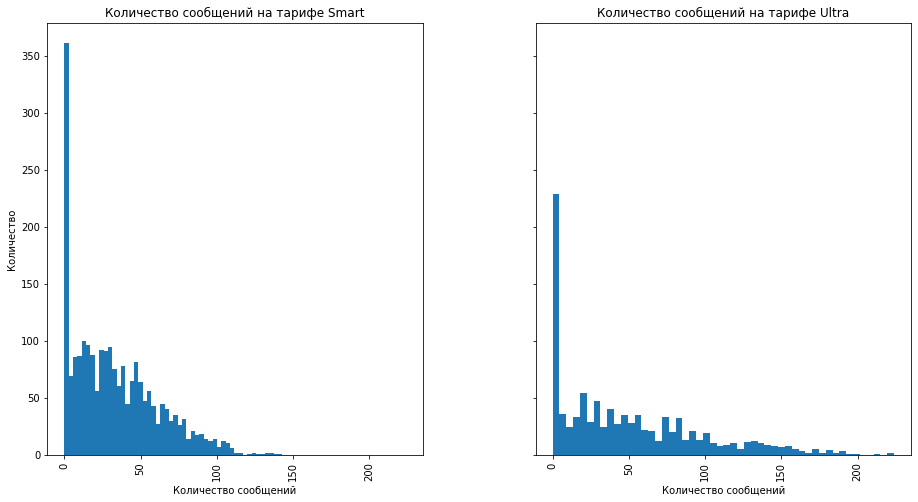

In [47]:
ax = users_monthly_activity.hist(column='msg_sent', by = 'tariff', layout=(1,2), 
                                 bins = 50, figsize = (15,8), sharey = True,  sharex = True)
ax[0].set_xlabel("Количество сообщений")
ax[0].set_ylabel("Количество")
ax[0].set_title("Количество сообщений на тарифе Smart")
ax[1].set_xlabel("Количество сообщений")
ax[1].set_ylabel("Количество")
ax[1].set_title("Количество сообщений на тарифе Ultra")
print('Тариф смарт\n',users_monthly_activity[users_monthly_activity['tariff'] == 'smart']['msg_sent'].describe()), 
print('\nТариф ультра\n',users_monthly_activity[users_monthly_activity['tariff'] == 'ultra']['msg_sent'].describe())
None

Тариф смарт
 count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Тариф ультра
 count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64


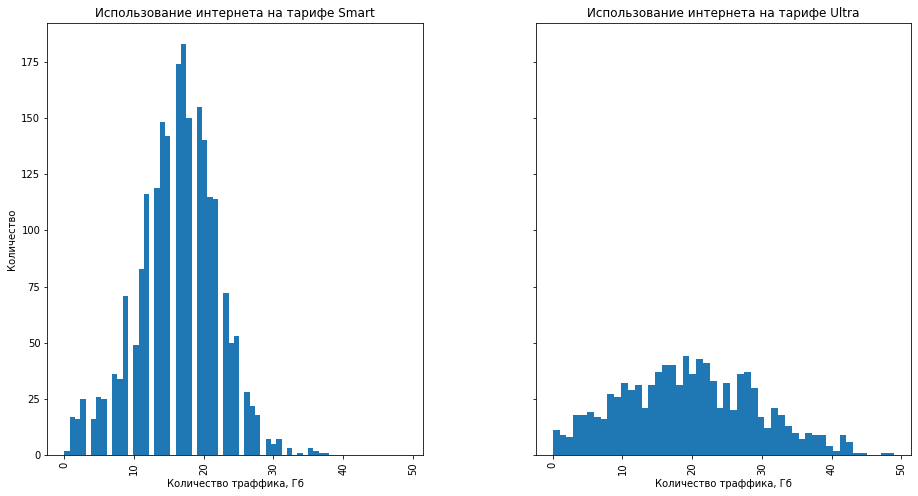

In [48]:
ax = users_monthly_activity.hist(column='gb_used', by = 'tariff', layout=(1,2), 
                                 bins = 50, figsize = (15,8), sharey = True,  sharex = True)
ax[0].set_xlabel("Количество траффика, Гб")
ax[0].set_ylabel("Количество")
ax[0].set_title("Использование интернета на тарифе Smart")
ax[1].set_xlabel("Количество траффика, Гб")
ax[1].set_ylabel("Количество")
ax[1].set_title("Использование интернета на тарифе Ultra")
print('Тариф смарт\n',users_monthly_activity[users_monthly_activity['tariff'] == 'smart']['gb_used'].describe()), 
print('\nТариф ультра\n',users_monthly_activity[users_monthly_activity['tariff'] == 'ultra']['gb_used'].describe())
None

|Параметр| Звонки, тариф смарт, мин|Звонки, тариф ультра, мин|Сообщения, тариф смарт|Сообщения, тариф ультра|Интернет, тариф смарт, Гб|Интернет, тариф ультра, Гб|
|-------|-------|-------|-------|-------|-------|-------|
| Среднее                 | 417.9      | 526.6         | 33.4 | 49.4      | 16.3         | 19.5       
| Стандартное отклонение  | 190.3       | 317.6          | 28.2 | 47.8       | 5.74          | 9.85  
| Оценка дисперсии*       | 36219.3       | 100873.6          | 796.8  | 2285.3       | 33.0          | 97.1   


### Анализ выручки

In [49]:
revenue_by_tariff_new = users_monthly_activity.pivot_table(
    index = 'tariff' , values = 'revenue', aggfunc = ['count', 'mean', 'median', sum])
revenue_by_tariff_new[('sum', 'revenue')] = revenue_by_tariff_new[('sum', 'revenue')]/1000000
revenue_by_tariff_new.columns = ['Количество пользователей', 'Средняя выручка, руб.', 
                                 "Медиана выручки, руб.", "Суммарная выручка, млн."]
revenue_by_tariff_new

,Количество пользователей,"Средняя выручка, руб.","Медиана выручки, руб.","Суммарная выручка, млн."
tariff,,,,
smart,2229,1289.973531,1023.0,2.875351
ultra,985,2070.152284,1950.0,2.039100


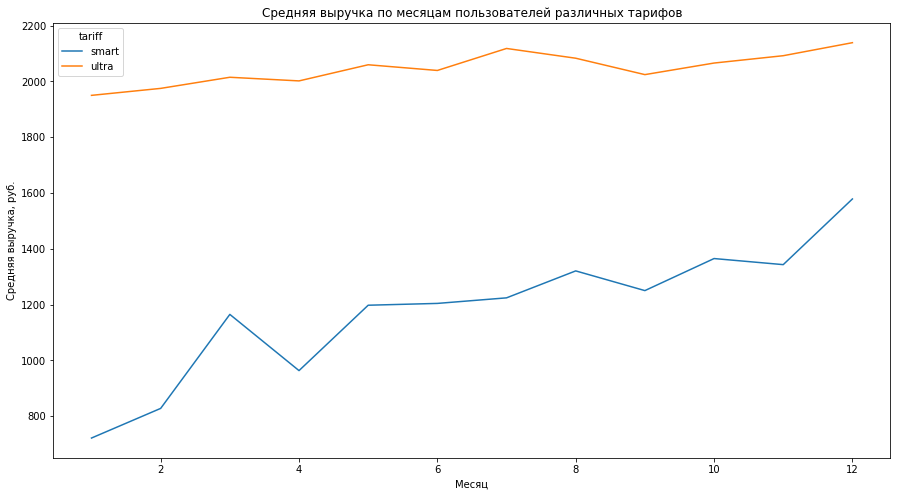

In [50]:
ax = users_monthly_activity.groupby(by = ['month', 'tariff']).mean()['revenue'].unstack(level=1).plot(
    subplots = False, figsize = (15,8))
ax.set_xlabel("Месяц")
ax.set_ylabel("Средняя выручка, руб.")
ax.set_title("Средняя выручка по месяцам пользователей различных тарифов")
None

<a id='graph'></a>

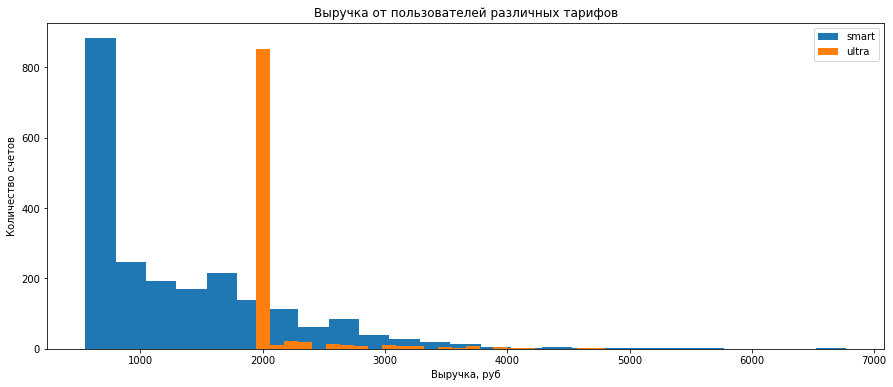

In [51]:
ax = users_monthly_activity.groupby(by = 'tariff')['revenue'].plot(kind = 'hist', figsize = (15,6), bins = 25, legend = True)
ax[0].set_xlabel("Выручка, руб")
ax[0].set_ylabel("Количество счетов")
ax[0].set_title("Выручка от пользователей различных тарифов")
None

In [52]:
print("Количество пользователей на различных тарифах, потративших больше стоимости пакета Ультра:\n",
      users_monthly_activity.query('revenue > 1950')['tariff'].value_counts())
None

Количество пользователей на различных тарифах, потративших больше стоимости пакета Ультра:
 smart    417
ultra    134
Name: tariff, dtype: int64


- Средняя выручка по тарифу "Смарт" растёт быстрее, чем по тарифу "Ультра";
- Гораздо больше пользователей тарифа "Смарт" тратят более 1950 рублей в месяц;
- Проверим, увеличится ли выручка, если перевести всех пользователей на тариф "Смарт".

In [53]:
for index, row in users_monthly_activity.iterrows():
    revenue = tariffs.loc[0, 'rub_monthly_fee']
    if (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[0, 'minutes_included']) > 0:
        revenue = revenue + (users_monthly_activity.loc[index, 'calls_duration'] - tariffs.loc[0, 'minutes_included'])*tariffs.loc[0, 'rub_per_minute']
    if (users_monthly_activity.loc[index, 'msg_sent'] - tariffs.loc[0, 'messages_included']) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'msg_sent'] - tariffs.loc[0, 'messages_included'])*tariffs.loc[0, 'rub_per_message']
    if (users_monthly_activity.loc[index, 'gb_used'] - 15) > 0:
            revenue = revenue + (users_monthly_activity.loc[index, 'gb_used'] - 15)*tariffs.loc[0, 'rub_per_gb']           
    users_monthly_activity.loc[index, 'revenue_if_smart'] = revenue

In [54]:
revenue_by_tariff_if_no_ultra = users_monthly_activity.pivot_table(
    index = 'tariff' , values = 'revenue_if_smart', aggfunc = ['count', 'mean', 'median', sum])

revenue_by_tariff_if_no_ultra[('sum', 'revenue_if_smart')] = revenue_by_tariff_if_no_ultra[('sum', 'revenue_if_smart')]/1000000
revenue_by_tariff_if_no_ultra.columns = ['Количество пользователей', 'Средняя выручка, руб.', 
                                 "Медиана выручки, руб.", "Суммарная выручка, млн."]

In [55]:
print('Выручка по пользователям с двумя базовыми тарифами')
display(revenue_by_tariff_new) 
print('\n\nВыручка по пользователям с одним базовым тарифом')
display(revenue_by_tariff_if_no_ultra)

Выручка по пользователям с двумя базовыми тарифами


,Количество пользователей,"Средняя выручка, руб.","Медиана выручки, руб.","Суммарная выручка, млн."
tariff,,,,
smart,2229,1289.973531,1023.0,2.875351
ultra,985,2070.152284,1950.0,2.039100




Выручка по пользователям с одним базовым тарифом


,Количество пользователей,"Средняя выручка, руб.","Медиана выручки, руб.","Суммарная выручка, млн."
tariff,,,,
smart,2229,1289.973531,1023.0,2.875351
ultra,985,2354.079188,1950.0,2.318768


In [56]:
print('Процент пользователей, использующих более 15Гб в месяц:')
f"{[users_monthly_activity.query('gb_used > 15').count() / users_monthly_activity.count()][0][1]:.1%}"

Процент пользователей, использующих более 15Гб в месяц:


'60.3%'

In [57]:
print('Процент пользователей, использующих более 30Гб в месяц:')
f"{[users_monthly_activity.query('gb_used > 30').count() / users_monthly_activity.count()][0][1]:.1%}"

Процент пользователей, использующих более 30Гб в месяц:


'4.7%'

Кратко: 
1) Пользователи тарифа ультра потребляют всех видов услуг больше, чем пользователи тарифа смарт.
    
    
2) При этом стоит отметить, что цена между тарифами различается в 3.5 раза, при этом среднее потребление услуг выше всего на 20-30%
    
    
3) Оценка дисперсии и стандартное отклонение параметров на тарифе ультра значительно больше, чем на тарифе смарт. Это означает, что разброс потребления услуг между пользователями тарифа ультра значительно сильнее, чем у тарифа смарт. Т.е. если у пользователей тарифа смарт ярко выраженный пик потребления на 16 Гб траффика в месяц, что хорошо согласуется со средним значением, то у пользователей тарифа ультра пик менее выражен, разброс по использованию трафика гораздо шире.
    
    
    
4) На тарифе смарт более 50% пользователей докупают интернет свыше лимита 15Гб, при этом на тарифе ультра около 80% пользователей укладываются в тарифный лимит 30ГБ.
    
    
5) БольшАя часть пользователей не пользуется отправкой сообщений. На тарифе смарт в лимит сообщений укладываются 75% пользователей, на тарифе ультра никто не использует полностью включенный пакет в 1000 сообщений (максимальное значение - 224 смс в месяц).
    
    
6) Почти та же ситуация со звонками. Около 60% пользователей тарифа смарт укладываются в лимит звонков, но никто из пользователей тарифа ультра не использует полностью включенный пакет в 3000 минут (максимальное значение - 1673)
    
    
7) Из-за большого искажения нормальности выборки по количеству использованных СМС - пик около нуля - стандартное отклонение очень велико. Особенно хорошо это видно на пользователях тарифа ультра, где стандартное отклонение практически равно среднему. 
    
    
8) Стоит так же отметить, что на распределении количества звонков в месяц правая часть нормального распределения спадает значительно быстрее, чем, например, на распределении количества использованного трафика. Это может говорит о том, что пользователи тарифа смарт не хотят переплачивать за звонки и снижают потребления данной услуги при превышении лимита. Но при этом они с гораздо большим желанием переплачивают за интернет. 


### Подытог
- Из анализа выручки можно сделать вывод, что большинство клиентов выбирают тариф смарт. 
- Средняя выручка с пользователя на тарифе ультра выше, чем на смарт на 780 рублей, но при этом самих пользователей тарифа лишь 30% от общего числа.
- Стоит так же отметить, что пользователи тарифа "смарт" платили более 1950 рублей в месяц 417 раз, при этом пользователи тарифа ультра платили свыше абоненсткой платы лишь 147 раз (почти в три раза реже).
- Так же заметим, что если пересчитать потребление услуг пользователей тарифа "ультра" по тарифной сетке "смарт", то общая выручка увеличится на 280 тысяч рублей или на 5.7% от общей выручки.
    
<b>Учитывая все вышеперечисленное, более перспективным является тариф "Smart", поскольку в 60% случаев пользователи используют интернет-трафик свыше 15 Гб в месяц, но лишь в 4.7% случаев они потребляют выше 30 Гб в месяц. <b>


## Проверка гипотез

1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.
 
Пояснить:
 - как вы формулировали нулевую и альтернативную гипотезы;
 - какой критерий использовали для проверки гипотез и почему.

### Гипотеза 1
    Проверим, что средняя выручка пользователей тарифов различаются.
    
- Нулевой гипотезой будет, что средняя выручка пользователей разных тарифов не различаются;
- Альтернативная гипотеза - средняя выручка пользователей по тарифам различается;
- У нас два независимых распределения, которые являются подвыборками (не полной совокупностью всех пользователей компании);
- Ранее мы уже проверяли, что их дисперсия различается.

In [58]:
alpha = 0.01
results = st.ttest_ind(users_monthly_activity.query('tariff == "smart"')['revenue'], 
                       users_monthly_activity.query('tariff == "ultra"')['revenue'],
                       equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Гипотеза 2

In [59]:
print('Выручка пользователей из Москвы: \n',users_monthly_activity.query('city == "Москва"')['revenue'].describe())
print('\nВыручка пользователей не из Москвы: \n',users_monthly_activity.query('city != "Москва"')['revenue'].describe())

Выручка пользователей из Москвы: 
 count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

Выручка пользователей не из Москвы: 
 count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64


    Проверим гипотезу, что средняя выручка абонентов из Москвы и других регионов тарифов различаются.
    
- Нулевой гипотезой будет, что средняя выручка не различаются;
- Альтернативная гипотеза - средняя выручка пользователей различается;
- У нас два независимых распределения, которые являются подвыборками (не полной совокупностью всех пользователей компании);
- Их дисперсия различается.

In [60]:

alpha = 0.01 

results = st.ttest_ind(users_monthly_activity.query('city == "Москва"')['revenue'], 
                       users_monthly_activity.query('city != "Москва"')['revenue'],
                       equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Дополнительный анализ
- Проверим, какую долю выручки приносит каждый из тарифов;
- Проверим, долю пользователей тарифов по месяцам в течении года;
- Проверим, какой процент пользователей докупает дополнительные услуги к тарифу.

In [61]:
mean_revenue_by_tariff = users_monthly_activity.pivot_table(
    index = 'tariff', values = 'revenue', aggfunc = 'sum')
mean_revenue_by_tariff['percent_to_total'] = mean_revenue_by_tariff['revenue']/mean_revenue_by_tariff.sum()['revenue']
mean_revenue_by_tariff.columns = ['Выручка, руб.', 'Доля от общего']
display(mean_revenue_by_tariff)
user_count_by_tariff = users_monthly_activity.pivot_table(
    index = 'tariff', values = 'user_id', aggfunc = 'count')
user_count_by_tariff['percent_to_total'] = user_count_by_tariff['user_id']/user_count_by_tariff.sum()['user_id']
user_count_by_tariff.columns = ['Количество пользователей', 'Доля от общего']
user_count_by_tariff

,"Выручка, руб.",Доля от общего
tariff,,
smart,2875351.0,0.585081
ultra,2039100.0,0.414919


,Количество пользователей,Доля от общего
tariff,,
smart,2229,0.693528
ultra,985,0.306472


In [62]:
#посчитаем, какой процент пользователей тарифов доплачивает за услуги сверх плана
print("Докупают услуги на тарифе смарт", users_monthly_activity.query('tariff == "smart" and revenue > 550').count()['user_id']/user_count_by_tariff.loc['smart','Количество пользователей']*100, '%')
print('Докупают услуги на тарифе ультра', users_monthly_activity.query('tariff == "ultra" and revenue > 1950').count()['user_id']/user_count_by_tariff.loc['ultra','Количество пользователей']*100, '%')

Докупают услуги на тарифе смарт 74.56258411843876 %
Докупают услуги на тарифе ультра 13.604060913705585 %


## Общий вывод

Вывод:
======

1. 30% абонентов подключают тариф 'Ультра' и приносят 41.5% от общей выручки. При этом лишь 13.6% из них используют платные опции сверх включенного пакета. В их случае это всегда дополнительные траты на интернет. При этом никто из пользователей тарифа полностью не потребляет пакет сообщений и звонков.
    
2. 70% абонентов подключают тариф "Смарт" и приносят 58.5% прибыли. При этом 74.6% из них докупают дополнительные услуги. 75% абонентов тарифа укладываются в лимит сообшений, в лимит звонков укладываются порядка 60% и лишь 40% (примерно) укладываются в лимит по интернет-трафику.
    
3. Дисперсии параметров тарифа ультра выше, чем у тарифа смарт, что говорит о большей разнице в привычках между абонентами-пользователями пакетов ультра, чем в пакете смарт.
    
4. Среднее потребление услуг по категориям выше у тарифа "ультра" на 20-30%, при этом цена на этот тариф выше в 3.5 раза.

5. Статистически однозначно, что средняя выручка с пользователей по тарифам отличается. Исходя из полученных данных, средняя выручка от пользователей тарифа "ультра" всегда выше.
    
6. Опровергнуть гипотезу, что средняя выручка на абонента в Москве отличается от других городов не получилось.
    
7. Чаще всего пользователи докупают доступ в интернет, реже звонки и очень редко смс-сообщения.
    
8. Расчеты показывают, что при пересчете потребления услуг пользователей с тарифом "ультра" по трафиной сетке "смарт" общая выручка от абонентов по году увеличится на 4.7%
    
9. Несморя на более низкую абоненскую плату, более чем в 60% случаев пользователи потребляют более 15 Гб интернета, но лишь в 4.7% случаев потребляют более 30Гб интернета. Таким образом, заложенные 30 Гб интернета в тариф ультра при пересчете на тариф "смарт" являются дополнительными (30 - 15) * 200 = 3000 рублей в месяц, которые могли бы доплатить пользователи.
    
10. Исходя из вышеперечисленного, более перспективным для компании «Мегалайн» является более массовый тариф "Смарт". 
